In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Spring mass damper  parameters 
w = 2*np.pi     # natural frequency
d = .25         # damping ratio

In [2]:
# define a linear spring-mass-damper system
A = np.array([[0,1],[-w**2, -2*d*w]])

dt = 0.01    # time step
T = 10       # amount of time to integrate



num_time_slices = int(T/dt)
time_slices = np.linspace(0,T,num_time_slices)
# xF = np.zeros((2,num_time_slices))

xF = np.empty((num_time_slices,2))

xF[0] = 2,0   # initial condition (x=2, v=0)

# Perform the two-stage time stepping.
for i in range(num_time_slices-1):
    k_1 = np.dot(A,xF[i])
    k_2 = np.dot(A,xF[i]+k_1*dt/2)
    k_3 = np.dot(A,xF[i]+k_2*dt/2)
    k_4 = np.dot(A,xF[i]+k_3*dt)
    xF[i+1] = xF[i] + dt/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
#     xF_star = xF[i] + 0.5*dt*(np.dot(A, xF[i]))
#     xF[i+1] = xF[i] + dt*(np.dot(A, xF_star))

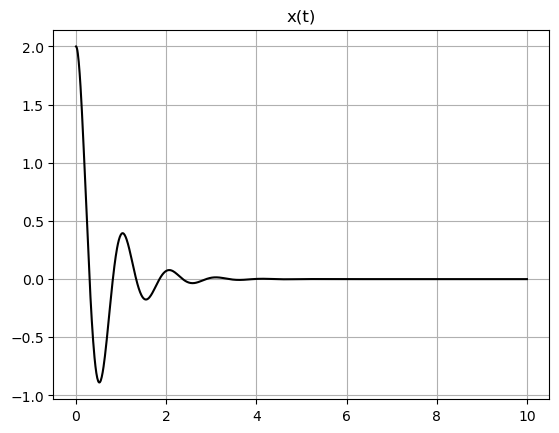

In [3]:
plt.plot(time_slices,xF[:,0],'k')
plt.grid(True)
plt.title('x(t)')
plt.show()